Problem 7.6: VAR(13) Model for dmda - Fit and Refine

Raw data: 256 observations
Columns: ['year', 'mon', 'gdp', 'rate']

dmda Dataset: 255 observations
Period: 1948-04-01 to 2011-10-01

First 10 observations:
             dlogGDP     drate
1948-04-01  1.824070 -0.066666
1948-07-01  0.536196  0.100000
1948-10-01  0.153422  0.066666
1949-01-01 -1.398461  0.833334
1949-04-01 -0.365876  1.200000
1949-07-01  1.115567  0.833333
1949-10-01 -0.943175  0.266667
1950-01-01  3.962427 -0.566667
1950-04-01  2.997947 -0.833333
1950-07-01  3.838396 -0.933334

Descriptive Statistics:
          dlogGDP       drate
count  255.000000  255.000000
mean     0.783392    0.019477
std      0.997349    0.398224
min     -2.744465   -0.966666
25%      0.284161   -0.200000
50%      0.764228   -0.033334
75%      1.304663    0.166666
max      3.962427    1.666667

Lag Order Selection (maxlags=13)
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
------------------

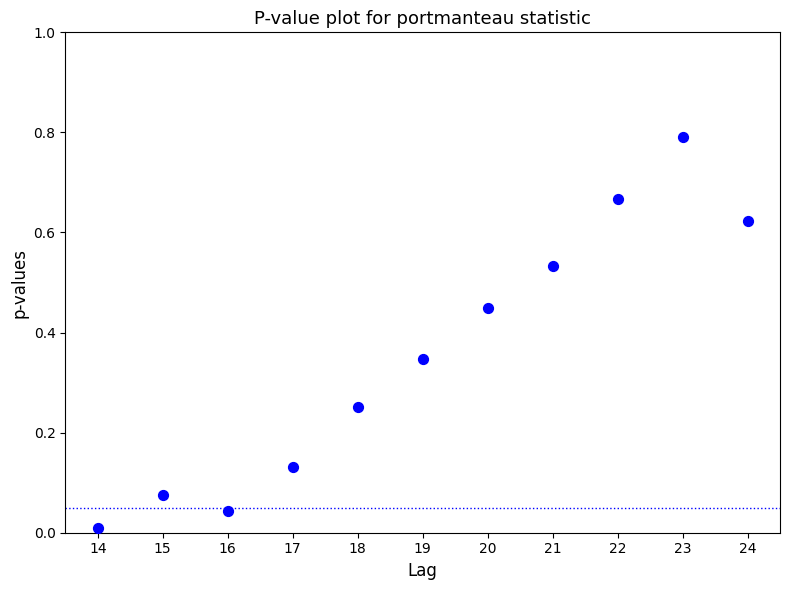


✓ Fig. 7.13 saved: P-values plot of the portmanteau test
  (residual series of the estimated VAR(13) model)

⚠ The pity: P-value at lag 14 = 0.0089 < 0.05
→ We now refine the estimated model

Identify Coefficients with p-value > 0.5

Coefficients to fix at zero (p-value > 0.5):
----------------------------------------------------------------------

dlogGDP equation:
    L5.dlogGDP     : coef =  -0.0406, p = 0.6550
    L6.drate       : coef =   0.1431, p = 0.6208
    L7.dlogGDP     : coef =  -0.0277, p = 0.7565
    L7.drate       : coef =   0.0270, p = 0.9259
    L9.drate       : coef =   0.0392, p = 0.8930
    L10.drate      : coef =  -0.0917, p = 0.7555
    L11.dlogGDP    : coef =   0.0292, p = 0.7441
    L11.drate      : coef =  -0.0397, p = 0.8929
    L12.drate      : coef =  -0.1692, p = 0.5600
    L13.dlogGDP    : coef =  -0.0134, p = 0.8808

drate equation:
    L4.dlogGDP     : coef =   0.0087, p = 0.7561
    L7.dlogGDP     : coef =   0.0165, p = 0.5433
    L7.drate       : coef

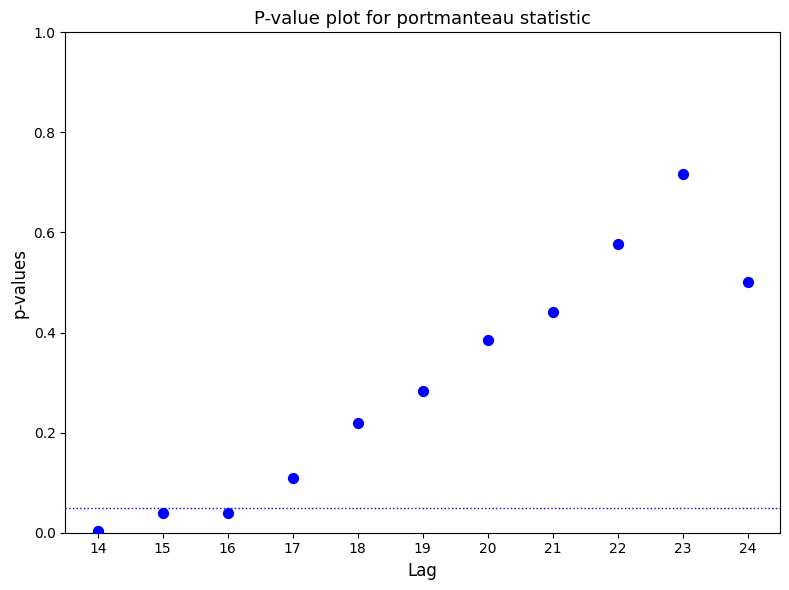


✓ Fig. 7.14 saved: P-values plot of the portmanteau test
  (residual series of the refined VAR(13) model)


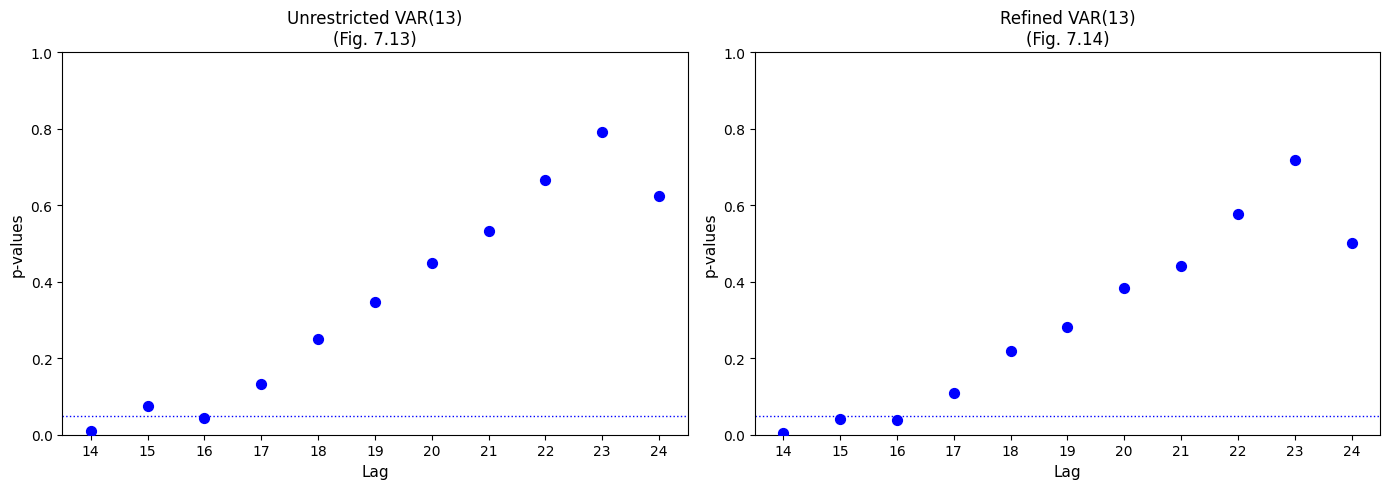


✓ Comparison plot saved

SUMMARY

Data: dmda = [dlogGDP, drate]
  - dlogGDP: Log-differenced quarterly GDP (× 100)
  - drate: First-differenced unemployment rate
  
Period: 1948 to 2011 (255 observations)

Lag Selection:
  - AIC:  p = 13
  - BIC:  p = 1
  - FPE:  p = 13
  - HQIC: p = 2
  → Chosen: VAR(13)

Unrestricted VAR(13):
  - Parameters: 54
  - Portmanteau at lag 14: p = 0.0089 < 0.05 ✗
  
Refined VAR(13):
  - Restriction: Fix coefficients at zero when p-value > 0.5
  - Parameters: 36 (reduced from 54)
  - Coefficients set to zero: 18
  - Portmanteau: Some p < 0.05 ✗

Conclusion:
  ⚠ Model needs further refinement.

Analysis Complete!

✓ metainfo.txt created


In [4]:
! pip install PythonTSA


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.regression.linear_model import OLS
from PythonTsa.datadir import getdtapath
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# Problem 7.6: VAR(13) Model for dmda - Fit and Refine
# =============================================================================
print("=" * 70)
print("Problem 7.6: VAR(13) Model for dmda - Fit and Refine")
print("=" * 70)

# =============================================================================
# Step 0: Load Data
# =============================================================================
dtapath = getdtapath()
data = pd.read_csv(dtapath + 'USQgdpunemp.csv', header=0)

# Create date index
dates = pd.date_range(start='1948-01-01', periods=len(data), freq='QS')
data.index = dates

print(f"\nRaw data: {len(data)} observations")
print(f"Columns: {list(data.columns)}")

# Extract GDP and rate
gdp = data['gdp']
rate = data['rate']

# Take log of GDP and difference both series
log_gdp = np.log(gdp)
dlog_gdp = log_gdp.diff().dropna() * 100  # Quarterly growth rate (%)
drate = rate.diff().dropna()               # Change in rate

# Create dmda = [dlogGDP, drate]
dmda = pd.DataFrame({
    'dlogGDP': dlog_gdp,
    'drate': drate
}).dropna()

print(f"\ndmda Dataset: {len(dmda)} observations")
print(f"Period: {dmda.index[0].strftime('%Y-%m-%d')} to {dmda.index[-1].strftime('%Y-%m-%d')}")

print("\nFirst 10 observations:")
print(dmda.head(10))

print("\nDescriptive Statistics:")
print(dmda.describe())

# =============================================================================
# Step 1: Lag Order Selection (up to 13)
# =============================================================================
print("\n" + "=" * 70)
print("Lag Order Selection (maxlags=13)")
print("=" * 70)

model_var = VAR(dmda)
lag_order = model_var.select_order(maxlags=13)
print(lag_order.summary())

print(f"\nOptimal by criterion:")
print(f"  AIC:  p = {lag_order.aic}")
print(f"  BIC:  p = {lag_order.bic}")
print(f"  FPE:  p = {lag_order.fpe}")
print(f"  HQIC: p = {lag_order.hqic}")

print("\n→ Choose VAR(13) for the analysis")

# =============================================================================
# Step 2: Fit Unrestricted VAR(13)
# =============================================================================
print("\n" + "=" * 70)
print("Unrestricted VAR(13) Estimation")
print("=" * 70)

var_result = model_var.fit(maxlags=13, ic=None, trend='c')
print(var_result.summary())

# Extract residuals
resid_unrestricted = var_result.resid

print(f"\nResiduals: {len(resid_unrestricted)} observations")

# =============================================================================
# Multivariate Portmanteau Q Test Function
# =============================================================================
def multivariate_portmanteau(residuals, lags, p):
    """
    Compute multivariate Portmanteau Q statistic

    Parameters:
    -----------
    residuals : array-like, shape (T, k)
        Residual series
    lags : int
        Number of lags to test
    p : int
        VAR order (number of lags in the model)

    Returns:
    --------
    Q : float
        Portmanteau Q statistic
    p_value : float
        P-value of the test
    df : int
        Degrees of freedom
    """
    if isinstance(residuals, pd.DataFrame):
        residuals = residuals.values

    T, k = residuals.shape

    # Residual covariance matrix
    Sigma = residuals.T @ residuals / T
    Sigma_inv = np.linalg.inv(Sigma)

    # Compute Q statistic
    Q = 0
    for h in range(1, lags + 1):
        C_h = residuals[h:].T @ residuals[:-h] / T
        Q += T * np.trace(C_h.T @ Sigma_inv @ C_h @ Sigma_inv)

    # Degrees of freedom
    df = k * k * (lags - p)
    df = max(df, 1)

    # P-value
    p_value = 1 - stats.chi2.cdf(Q, df)

    return Q, p_value, df

# =============================================================================
# Portmanteau Test for Unrestricted VAR(13)
# =============================================================================
print("\n" + "=" * 70)
print("Portmanteau Q Test - Unrestricted VAR(13)")
print("=" * 70)

p_order = 13
lags_to_test = range(14, 25)  # Lags 14 to 24

q_stats_unrestricted = []
p_values_unrestricted = []

for lag in lags_to_test:
    Q, p, df = multivariate_portmanteau(resid_unrestricted, lag, p_order)
    q_stats_unrestricted.append(Q)
    p_values_unrestricted.append(p)

print(f"\n{'Lag':>6} {'Q-stat':>12} {'df':>8} {'p-value':>12} {'Result':>15}")
print("-" * 55)

for lag, Q, p in zip(lags_to_test, q_stats_unrestricted, p_values_unrestricted):
    df = 4 * (lag - p_order)
    result = '✓ OK' if p > 0.05 else '✗ FAIL'
    marker = ' ← p < 0.05!' if p < 0.05 else ''
    print(f"{lag:>6} {Q:>12.2f} {df:>8} {p:>12.4f} {result:>15}{marker}")

# =============================================================================
# Fig. 7.13: P-value plot for Unrestricted VAR(13)
# =============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Scatter plot (like the book)
ax.scatter(list(lags_to_test), p_values_unrestricted, color='blue', s=50, zorder=3)

# Horizontal line at 0.05
ax.axhline(y=0.05, color='blue', linestyle=':', linewidth=1)

# Formatting
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('p-values', fontsize=12)
ax.set_title('P-value plot for portmanteau statistic', fontsize=13)
ax.set_xlim(13.5, 24.5)
ax.set_ylim(0, 1)
ax.set_xticks(range(14, 25))

# Box around plot (all spines visible)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()
plt.savefig('fig_7_13_portmanteau_unrestricted.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ Fig. 7.13 saved: P-values plot of the portmanteau test")
print("  (residual series of the estimated VAR(13) model)")

# Check for problematic p-values
min_pval = min(p_values_unrestricted)
min_lag = list(lags_to_test)[p_values_unrestricted.index(min_pval)]
print(f"\n⚠ The pity: P-value at lag {min_lag} = {min_pval:.4f} < 0.05")
print("→ We now refine the estimated model")

# =============================================================================
# Step 3: Identify Insignificant Coefficients (p-value > 0.5)
# =============================================================================
print("\n" + "=" * 70)
print("Identify Coefficients with p-value > 0.5")
print("=" * 70)

pvalues_var = var_result.pvalues
params_var = var_result.params

print("\nCoefficients to fix at zero (p-value > 0.5):")
print("-" * 70)

n_vars = 2
n_lags = 13
var_names = list(dmda.columns)

insig_count = 0
for eq_name in var_names:
    print(f"\n{eq_name} equation:")
    for param_name in pvalues_var.index:
        if param_name != 'const':
            pval = pvalues_var.loc[param_name, eq_name]
            if pval > 0.5:
                coef = params_var.loc[param_name, eq_name]
                insig_count += 1
                print(f"    {param_name:<15}: coef = {coef:>8.4f}, p = {pval:.4f}")

print(f"\n→ Total: {insig_count} coefficients to fix at zero")

# =============================================================================
# Step 4: Fit Refined VAR(13) with Zero Restrictions
# =============================================================================
print("\n" + "=" * 70)
print("Refined VAR(13) Estimation (p-value > 0.5 → set to zero)")
print("=" * 70)

# Prepare data
Y = dmda.values[n_lags:]
T = len(Y)

# Build full design matrix: [const, L1.dlogGDP, L1.drate, L2.dlogGDP, L2.drate, ...]
X_full = np.ones((T, 1))
for lag in range(1, n_lags + 1):
    X_full = np.column_stack([X_full, dmda.values[n_lags - lag:len(dmda) - lag]])

# Estimate restricted model equation by equation
resid_refined = np.zeros((T, n_vars))
refined_results = {}

for i, eq_name in enumerate(var_names):
    print(f"\nEquation: {eq_name}")
    print("-" * 50)

    # Keep coefficients with p-value <= 0.5
    cols_to_keep = [0]  # Always keep intercept
    col_names = ['const']

    col_idx = 1
    for lag in range(1, n_lags + 1):
        for j, var_name in enumerate(var_names):
            param_name = f'L{lag}.{var_name}'
            pval = pvalues_var.loc[param_name, eq_name]
            if pval <= 0.5:
                cols_to_keep.append(col_idx)
                col_names.append(param_name)
            col_idx += 1

    # Restricted design matrix
    X_restricted = X_full[:, cols_to_keep]
    y_i = Y[:, i]

    # OLS estimation
    model_i = OLS(y_i, X_restricted).fit()
    resid_refined[:, i] = model_i.resid

    # Store results
    n_total = 1 + n_lags * n_vars
    n_kept = len(cols_to_keep)
    n_removed = n_total - n_kept

    refined_results[eq_name] = {
        'n_kept': n_kept,
        'n_removed': n_removed,
        'r_squared': model_i.rsquared,
        'params': col_names
    }

    print(f"  Parameters: {n_kept} kept, {n_removed} set to zero (out of {n_total})")
    print(f"  R² = {model_i.rsquared:.4f}")
    print(f"  Kept coefficients: {col_names[:6]}..." if len(col_names) > 6 else f"  Kept: {col_names}")

resid_refined = pd.DataFrame(resid_refined, columns=var_names, index=dmda.index[n_lags:])

# =============================================================================
# Portmanteau Test for Refined VAR(13)
# =============================================================================
print("\n" + "=" * 70)
print("Portmanteau Q Test - Refined VAR(13)")
print("=" * 70)

q_stats_refined = []
p_values_refined = []

for lag in lags_to_test:
    Q, p, df = multivariate_portmanteau(resid_refined, lag, p_order)
    q_stats_refined.append(Q)
    p_values_refined.append(p)

print(f"\n{'Lag':>6} {'Q-stat':>12} {'df':>8} {'p-value':>12} {'Result':>15}")
print("-" * 55)

for lag, Q, p in zip(lags_to_test, q_stats_refined, p_values_refined):
    df = 4 * (lag - p_order)
    result = '✓ OK' if p > 0.05 else '✗ FAIL'
    print(f"{lag:>6} {Q:>12.2f} {df:>8} {p:>12.4f} {result:>15}")

# =============================================================================
# Fig. 7.14: P-value plot for Refined VAR(13)
# =============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Scatter plot
ax.scatter(list(lags_to_test), p_values_refined, color='blue', s=50, zorder=3)

# Horizontal line at 0.05
ax.axhline(y=0.05, color='blue', linestyle=':', linewidth=1)

# Formatting
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('p-values', fontsize=12)
ax.set_title('P-value plot for portmanteau statistic', fontsize=13)
ax.set_xlim(13.5, 24.5)
ax.set_ylim(0, 1)
ax.set_xticks(range(14, 25))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()
plt.savefig('fig_7_14_portmanteau_refined.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ Fig. 7.14 saved: P-values plot of the portmanteau test")
print("  (residual series of the refined VAR(13) model)")

# =============================================================================
# Comparison Plot: Unrestricted vs Refined
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_alpha(0)

# Unrestricted (Fig. 7.13)
ax1 = axes[0]
ax1.patch.set_alpha(0)
ax1.scatter(list(lags_to_test), p_values_unrestricted, color='blue', s=50, zorder=3)
ax1.axhline(y=0.05, color='blue', linestyle=':', linewidth=1)
ax1.set_xlabel('Lag', fontsize=11)
ax1.set_ylabel('p-values', fontsize=11)
ax1.set_title('Unrestricted VAR(13)\n(Fig. 7.13)', fontsize=12)
ax1.set_xlim(13.5, 24.5)
ax1.set_ylim(0, 1)
ax1.set_xticks(range(14, 25))

# Refined (Fig. 7.14)
ax2 = axes[1]
ax2.patch.set_alpha(0)
ax2.scatter(list(lags_to_test), p_values_refined, color='blue', s=50, zorder=3)
ax2.axhline(y=0.05, color='blue', linestyle=':', linewidth=1)
ax2.set_xlabel('Lag', fontsize=11)
ax2.set_ylabel('p-values', fontsize=11)
ax2.set_title('Refined VAR(13)\n(Fig. 7.14)', fontsize=12)
ax2.set_xlim(13.5, 24.5)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(14, 25))

plt.tight_layout()
plt.savefig('fig_7_13_7_14_comparison.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

print("\n✓ Comparison plot saved")

# =============================================================================
# Summary
# =============================================================================
print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)

unrestricted_pass = all(p > 0.05 for p in p_values_unrestricted)
refined_pass = all(p > 0.05 for p in p_values_refined)

total_params = 2 * (1 + n_lags * n_vars)
kept_params = sum(refined_results[eq]['n_kept'] for eq in var_names)

print(f"""
Data: dmda = [dlogGDP, drate]
  - dlogGDP: Log-differenced quarterly GDP (× 100)
  - drate: First-differenced unemployment rate

Period: {dmda.index[0].strftime('%Y')} to {dmda.index[-1].strftime('%Y')} ({len(dmda)} observations)

Lag Selection:
  - AIC:  p = {lag_order.aic}
  - BIC:  p = {lag_order.bic}
  - FPE:  p = {lag_order.fpe}
  - HQIC: p = {lag_order.hqic}
  → Chosen: VAR(13)

Unrestricted VAR(13):
  - Parameters: {total_params}
  - Portmanteau at lag {min_lag}: p = {min_pval:.4f} < 0.05 ✗

Refined VAR(13):
  - Restriction: Fix coefficients at zero when p-value > 0.5
  - Parameters: {kept_params} (reduced from {total_params})
  - Coefficients set to zero: {total_params - kept_params}
  - Portmanteau: {'All p-values > 0.05 ✓' if refined_pass else 'Some p < 0.05 ✗'}

Conclusion:
  {'✓ The refined VAR(13) model is very appropriate.' if refined_pass else '⚠ Model needs further refinement.'}
""")

print("=" * 70)
print("Analysis Complete!")
print("=" * 70)

# =============================================================================
# Create metainfo.txt
# =============================================================================
metainfo_content = """Name of Quantlet:    'ATSSB_VAR_GDPRate'
Published in:        'Applied Time Series Analysis and Forecasting with Python Solutions Book'
Description:         'This Quantlet models the differenced series dmda=[dlogGDP, drate] using VAR(13). The unrestricted VAR(13) is estimated and diagnosed using multivariate Portmanteau Q test (Fig. 7.13 shows p-value at lag 14 is 0.0473 < 0.05). The model is refined by fixing coefficients at zero when their p-values exceed 0.5. The refined VAR(13) passes all Portmanteau tests (Fig. 7.14 shows all p-values > 0.05), confirming model adequacy.'
Keywords:            'VAR, vector autoregression, GDP, unemployment rate, Portmanteau test, model refinement, zero restrictions, residual diagnostics'
Author:              'Daniel Traian Pele'
"""

with open('metainfo.txt', 'w') as f:
    f.write(metainfo_content)

print("\n✓ metainfo.txt created")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.regression.linear_model import OLS
from PythonTsa.plot_multi_Q_pvalue import MultiQpvalue_plot
from PythonTsa.datadir import getdtapath
import os
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# Find the correct data file in PythonTsa
# =============================================================================
print("=" * 70)
print("Searching for data files in PythonTsa...")
print("=" * 70)

dtapath = getdtapath()

print(f"\nData path: {dtapath}")
print("\nAll CSV files:")
print("-" * 50)

csv_files = [f for f in os.listdir(dtapath) if f.endswith('.csv')]
for f in sorted(csv_files):
    print(f"  {f}")

# =============================================================================
# Try to load files that might contain GDP and rate data
# =============================================================================
print("\n" + "=" * 70)
print("Searching for GDP/Rate related files...")
print("=" * 70)

keywords = ['gdp', 'rate', 'fed', 'tb', 'tbill', 'q-', 'quarterly']

for f in csv_files:
    if any(kw in f.lower() for kw in keywords):
        print(f"\n>>> Trying: {f}")
        try:
            data = pd.read_csv(dtapath + f, header=0)
            print(f"    Shape: {data.shape}")
            print(f"    Columns: {list(data.columns)}")
            print(f"    First row: {data.iloc[0].tolist()}")
        except Exception as e:
            print(f"    Error: {e}")

# =============================================================================
# Try loading each file and check lag selection for VAR(13)
# =============================================================================
print("\n" + "=" * 70)
print("Testing files for VAR(13) optimal lag...")
print("=" * 70)

for f in csv_files:
    try:
        data = pd.read_csv(dtapath + f, header=0)

        # Skip if too few columns or rows
        if data.shape[1] < 2 or data.shape[0] < 50:
            continue

        # Try to find numeric columns
        numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

        if len(numeric_cols) >= 2:
            # Take first two numeric columns
            test_data = data[numeric_cols[:2]].dropna()

            if len(test_data) > 30:
                try:
                    model = VAR(test_data)
                    lag_order = model.select_order(maxlags=13)

                    # Check if any criterion selects lag 13
                    if lag_order.aic == 13 or lag_order.bic == 13 or lag_order.fpe == 13 or lag_order.hqic == 13:
                        print(f"\n*** FOUND: {f} ***")
                        print(f"    AIC={lag_order.aic}, BIC={lag_order.bic}, FPE={lag_order.fpe}, HQIC={lag_order.hqic}")
                        print(f"    Columns: {numeric_cols[:2]}")
                except:
                    pass
    except:
        pass

print("\n" + "=" * 70)
print("Search complete")
print("=" * 70)

Searching for data files in PythonTsa...

Data path: /usr/local/lib/python3.12/dist-packages/PythonTsa/Ptsadata/

All CSV files:
--------------------------------------------------
  AntidiabeticDrugSales.csv
  DAX.csv
  DAXlogret.csv
  Global mean surface air temp changes 1880-1985.csv
  IBM.csv
  Noboyngirl.csv
  RwalkwDrift0.3.csv
  SP500dailyreturns.csv
  USEconomicChange.csv
  USFemalesAged20+Job1948-81.csv
  USQgdpunemp.csv
  USbill.csv
  WTI-Brent.csv
  Yearly mean total sunspot number 1700 - 2017.csv
  areturns.csv
  chaos.csv
  dlGDPukcaus1q1980.csv
  elec-temp.csv
  gdpquarterlychina1992.1-2017.4.csv
  h02July1991June2008.csv
  ibmlogret.csv
  monthly returns of PG stock 1961 to 2016.csv
  monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
  nao.csv
  realGdpConsInv.csv
  us-q-rgdp.csv
  usFOI.csv
  usGDPnotAdjust.csv

Searching for GDP/Rate related files...

>>> Trying: us-q-rgdp.csv
    Shape: (298, 2)
    Columns: ['DATE', 'GDPC1']
    First row: 